# Problema de Classificação - UCI - Absenteeism_at_work

Esse notebook está usando uma base de dados aberta obtida em https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work.

Originalmente, como será observado, este dataset é para problemas de regressão, porém, criei uma reposta/target/variável dependente para este exercício.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly
# from bokeh.plotting import figure
# from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler
                                   , MinMaxScaler)
from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
nomeDaBase = "../bases/Absenteeism_at_work.csv"
df = pd.read_csv(nomeDaBase, sep=";", encoding="utf-8")

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


## Cardinalidade
Varificando a cardinalidade dos atributos inteiros. No dataset passado, as variáveis categóricas devem ter passado por um processo de Label Encoder e, portanto, estão como números inteiros. Abaixo, veremos a cardinalidade de cada atributo e analisaremos para ver como tratar cada caso.

In [5]:
df = df.select_dtypes(exclude=["float64"])

matriz_cardialidade = []

for i, coluna in df.items():
    matriz_cardialidade.append([i, len(df[i].unique()), df[i].unique()])
            
matriz_cardialidade = pd.DataFrame(matriz_cardialidade, columns=["Atributo", "Cardinalidade", "Valores"])
matriz_cardialidade.sort_values(by="Cardinalidade", inplace=True, ascending=True)
    
matriz_cardialidade

,Atributo,Cardinalidade,Valores
14,Social smoker,2,"[0, 1]"
13,Social drinker,2,"[1, 0]"
10,Disciplinary failure,2,"[0, 1]"
4,Seasons,4,"[1, 4, 2, 3]"
11,Education,4,"[1, 3, 2, 4]"
3,Day of the week,5,"[3, 4, 5, 6, 2]"
12,Son,5,"[2, 1, 0, 4, 3]"
15,Pet,6,"[1, 0, 4, 2, 5, 8]"
9,Hit target,13,"[97, 92, 93, 95, 99, 96, 94, 98, 81, 88, 100, 87, 91]"
2,Month of absence,13,"[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 0]"


## Análise preliminar da base e ações:
1. **Existência de campo de identificação:** Remover campos que identifiquem a pessoa, pois queremos um modelo capaz de generalizar.
2. **Incongruências no fator/atribuo/variável independente "Month of absence":** Existem 3 registros "0", o que não é possível.

### Arrumando base:
1. **Existência de campo de identificação:** Remover campos que identifiquem a pessoa, pois queremos um modelo capaz de generalizar.

In [6]:
df_temporario = df.drop(["ID"], axis=1).copy()

2. **Incongruências no fator/atribuo/variável independente "Month of absence":** Existem 3 registros "0", o que não é possível.

In [7]:
seasons_list = sorted(df_temporario["Seasons"].unique())

for season in seasons_list:
    if 0 in (df_temporario[df_temporario["Seasons"] == season]["Month of absence"].unique()):
        print(f"""Estação: {season}""")
        print(f"""{df_temporario[df_temporario["Seasons"] == season]["Month of absence"].value_counts()}""")
        print("-"*50)

Estação: 1
7    67
8    54
9    32
6    16
0    1 
Name: Month of absence, dtype: int64
--------------------------------------------------
Estação: 2
2     72
3     60
1     50
12    9 
0     1 
Name: Month of absence, dtype: int64
--------------------------------------------------
Estação: 3
5    64
4    53
6    38
3    27
0    1 
Name: Month of absence, dtype: int64
--------------------------------------------------


Como tratam-se de poucos registros, vou substituir o 0 de cada "Month of absence" pela categoria de maior frequência dentro de cada estação.

In [8]:
df_temporario.loc[(df_temporario["Seasons"] == 1) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = 7
df_temporario.loc[(df_temporario["Seasons"] == 2) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = 2
df_temporario.loc[(df_temporario["Seasons"] == 3) & (df_temporario["Month of absence"] == 0), ["Month of absence"]] = 5

# Criação de novo target
No problema original, a variável resposta/variável dependente/target é "Absenteeism time in hours". Porém, para facilitar a minha vida criei uma regra e, consequentemente, um novo target "Absenteeism". Esse novo target assumi valor 0 (<=2h) ou 1(>2h).

In [9]:
df_temporario["Absenteeism"] = np.where(df_temporario["Absenteeism time in hours"] <= 2, 0, 1)

df_temporario.drop("Absenteeism time in hours", axis=1, inplace=True)

In [10]:
df_temporario.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism
0,26,7,3,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,1
1,0,7,3,1,118,13,18,50,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,97,0,1,0,1,0,0,89,170,31,0
3,7,7,5,1,279,5,14,39,97,0,1,2,1,1,0,68,168,24,1
4,23,7,5,1,289,36,13,33,97,0,1,2,1,0,1,90,172,30,0


In [11]:
# sns.pairplot(df_para_grafico, kind="scatter", hue="Absenteeism", plot_kws=dict(s=80, edgecolor="white", linewidth=1.0))
# plt.show()

# Feature selection:
Vou usar três técnicas para verificar o impacto dos atributos categóricos sobre a resposta:
1. Fischer score;
2. ROC-AUC para uma variável; e
3. Boruta.

Dividindo o dataset em treino e teste:

In [12]:
x = df_temporario.drop("Absenteeism", axis=1)
y = df_temporario.Absenteeism

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 1. Fischer score

In [13]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import (SelectKBest
                                       , SelectPercentile)

In [14]:
f_score = chi2(x_train.fillna(0), y_train)

pvalues = pd.Series(f_score[1])
pvalues.index = x_train.columns
pvalues.sort_values(ascending=True)

Transportation expense             5.121747e-25
Disciplinary failure               1.731971e-11
Distance from Residence to Work    2.085177e-10
Son                                6.263999e-05
Reason for absence                 5.724123e-03
Social drinker                     3.894660e-02
Age                                1.394800e-01
Month of absence                   3.620260e-01
Weight                             4.292626e-01
Body mass index                    4.410856e-01
Service time                       5.114369e-01
Day of the week                    5.865844e-01
Seasons                            6.450742e-01
Height                             7.401364e-01
Social smoker                      8.171915e-01
Education                          8.176810e-01
Hit target                         9.321219e-01
Pet                                9.800613e-01
dtype: float64

In [15]:
atributos_fisher = list(pvalues[pvalues<1e-02].index)

**Conclusão do uso do Fisher score:** A lista acima indica, de cima para baixo, os fatores com maior importância para a resposta. Eu escolherei trabalhar com as 4 primeiras. 

## 2. ROC-AUC para uma variável

In [16]:
from sklearn.tree import (DecisionTreeClassifier
                          , DecisionTreeRegressor)
from sklearn.metrics import (roc_auc_score
                             , mean_squared_error)

In [17]:
roc_values = []
for atributo in x_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_train[atributo].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(x_test[atributo].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
roc_values = pd.Series(roc_values)
roc_values.index = x_train.columns
roc_values.sort_values(ascending=False)

Reason for absence                 0.822582
Distance from Residence to Work    0.667813
Transportation expense             0.662738
Height                             0.656698
Weight                             0.644115
Body mass index                    0.642438
Age                                0.628597
Service time                       0.618782
Month of absence                   0.602802
Son                                0.591058
Disciplinary failure               0.565934
Seasons                            0.561824
Pet                                0.561027
Social drinker                     0.540391
Education                          0.520174
Hit target                         0.506669
Social smoker                      0.502433
Day of the week                    0.495051
dtype: float64

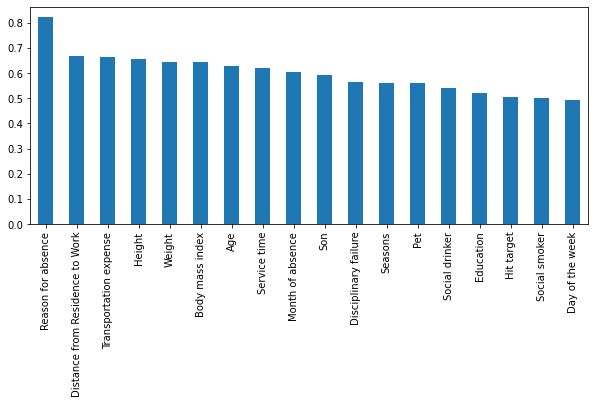

In [18]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(10, 4));

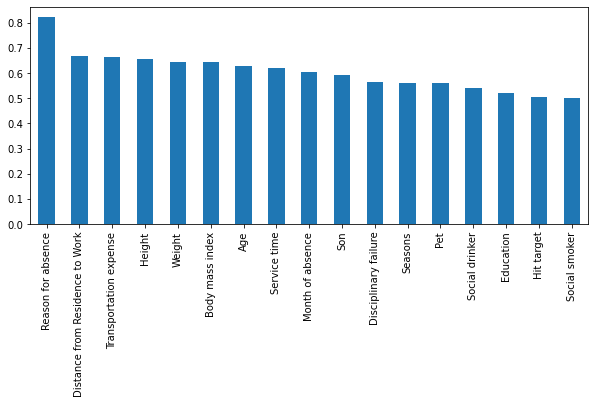

In [19]:
roc_values[roc_values > 0.5].sort_values(ascending=False).plot.bar(figsize=(10, 4));

In [20]:
atributos_roc_auc = list(roc_values[roc_values > 0.5].index)

**Conclusão do uso do ROC-AUC para cada variável:** A lista acima indica, de cima para baixo, os fatores com maior importância para a resposta. Ao pé da letra, todos os atributos com ROC-AUC acima de 0,50 podem impactar na resposta., ou seja, apenas um atributo foi excluído.

## 3. Boruta
Nunca usei o Boruta. Essa técnica surgiu em uma conversa no trabalho e eu usei o seguinte post para testar essa técnica: http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/

In [21]:
# !pip install boruta

In [22]:
from sklearn.ensemble import RandomForestClassifier
from boruta import boruta_py as boruta

ModuleNotFoundError: No module named 'boruta'

In [ ]:
x_train.shape, y_train.shape

In [ ]:
classificador = RandomForestClassifier(n_estimators=20
                                       , criterion="entropy"
                                       , max_depth=(len(x_train.columns)**.5)
                                       , random_state=0)

seletor_atributos = boruta.BorutaPy(classificador, n_estimators="auto", verbose=0)
seletor_atributos.fit(x_train.values, y_train)

In [ ]:
atributos_boruta = list(x_train.iloc[:, seletor_atributos.support_].columns)

In [ ]:
x_train_filtrado = seletor_atributos.transform(x_train.values)
x_train_filtrado = pd.DataFrame(x_train_filtrado, columns=x_train.iloc[:, seletor_atributos.support_].columns)
x_train_filtrado.head().T

In [ ]:
x_test_filtrado = seletor_atributos.transform(x_test.values)
x_test_filtrado = pd.DataFrame(x_test_filtrado, columns=x_train.iloc[:, seletor_atributos.support_].columns)
x_test_filtrado.head().T

**Conclusão do uso do Boruta:** Já com o Boruta, reduzimos nossos fatores de 18 para 5. Ao longo do resto deste notebook, usarei os fatores selecionados pelo Boruta e, depois, compararemos um dos modelos com todos os conjuntos de atributos que achamso com os três métodos de seleção (Ficher score, ROC-AUC para uma variáve e Boruta).

# Aplicação dos modelos:

Vou testar alguns modelos separadamente e na seguinte ordem:

1. Árvore de decisão
2. Random forest
3. Logistic regression
4. Naive Bayes
5. SVM e Kernel SVM

# 1. Árvore de decisão
Comecei por esse pois é o modelo mais robusto a um dataprep mal feito.

In [ ]:
from sklearn.tree import (DecisionTreeClassifier
                          , export)

# classificador = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=(len(x.columns)**0.5)*2)
classificador = DecisionTreeClassifier(criterion='entropy'
                                       , random_state=0
                                       , max_depth=len(x_train_filtrado.columns))

classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

In [ ]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

In [ ]:
feature_importance = pd.DataFrame(data=(classificador.feature_importances_).reshape(1,len(x_train_filtrado.columns))
                                  , columns=x_train_filtrado.columns)

feature_importance = feature_importance.T

feature_importance.sort_values(by=0, ascending=False)

# 2. Random forest
Outro modelo robusto a um dataprep mal feito.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=40
                                       , criterion='entropy'
                                       , random_state=0
                                       , max_depth=len(x_train_filtrado.columns))

classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

In [ ]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

In [ ]:
feature_importance = pd.DataFrame(data=(classificador.feature_importances_).reshape(1,len(x_train_filtrado.columns))
                                  , columns=x_train_filtrado.columns)

feature_importance = feature_importance.T

feature_importance.sort_values(by=0, ascending=False)

# 3. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(solver="lbfgs"
                                   , max_iter=500)
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

In [ ]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

In [ ]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 5. SVM

In [ ]:
from sklearn.svm import SVC

classificador = SVC(kernel='linear', random_state=0)
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

In [ ]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 6. Kernel SVM

In [ ]:
from sklearn.svm import SVC

classificador = SVC(kernel='rbf', random_state=0, gamma="auto")
classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

In [ ]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

Sumarizando os resultados e usando a **acurácia como métrica de comparação**, temos:

1. Árvore de decisão: 0,75
2. Random forest: 0,77
3. Logistic regression: 0,68 
4. Naive Bayes: 0,64
5. SVM: 0,64
6. Kernel SVM: 0,73

**Conclusão da comparação de modelos:** O modelo obtido usando a técnica Random Forest possui a maior acurácia e, portanto, usaremos esse modelo para o resto do notebook. **IMPORTANTÍSSIMO** salientar que não otimizamos os hiperparâmetros de cada modelo e há espaço para melhoria de cada um.

# Comparando os conjuntos de atributos

Nessa seção, faremos uma comparação entre os conjuntos de parâmetros obtidos com cada técnica de seleção de atributos.

Do **Fisher score** pegaremos:

In [ ]:
atributos_fisher

Do **ROC-AUC para uma variável** pegaremos:

In [ ]:
atributos_roc_auc

Do **Boruta**, já usamos, mas reforço que usamos:

In [ ]:
atributos_boruta

## Aplicando a random forest em cada conjunto de atributos:

In [ ]:
listas_conjuntos_atributos = [atributos_fisher, atributos_roc_auc, atributos_boruta]

listas_conjuntos_nomes = ["Fischer score", "ROC-AUC para uma variável", "Boruta"]

acuracia_modelos = {}

for i, lista in enumerate(listas_conjuntos_atributos):
    x_train_filtrado = x_train[lista]
    x_test_filtrado = x_test[lista]
    
    classificador = RandomForestClassifier(n_estimators=40
                                           , criterion='entropy'
                                           , random_state=0
                                           , max_depth=len(x_train_filtrado.columns))
    
    classificador.fit(x_train_filtrado, y_train)
    
    y_pred = classificador.predict(x_test_filtrado)
    
    acuracia_modelos[listas_conjuntos_nomes[i]] = [accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
                                                   , len(lista)
                                                   , lista]
    
#     print("-"*50)
#     print(listas_conjuntos_nomes[i])
#     print("Métrica (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))
#     print("-"*50)
    

acuracia_modelos = pd.DataFrame.from_dict(data=acuracia_modelos
                                          , orient="index"
                                          , columns=["Acurácia", "Qtd atributos", "Lista de atributos"])
acuracia_modelos

**Conclusão da comparação de modelos:** Os atributos obtidos com a técnica Fisher score resultaram num modelo que teve a maior acurácia, quase 4% maior que o modelo obtido com os atributos selecionados pela técnica boruta e com apenas 1 atributo a mais que o selecionado pelo Boruta.
A partir deste ponto, usarei os atributos selecionados pela técnica Fischer Score.

# Parte final: Refinando o modelo
Agora com o modelo selecionado (Random Forest) e os atributos selecionados (Reason for absence, Transportation expense, Distance from Residence to Work, Disciplinary failure, Son), vamos refinar o modelo e finalizar esse notebook.

Primeiro, vamos otimizar os hiperparâmetros usando **Grid search**.

## Grid Search

In [ ]:
x_train_filtrado = x_train[atributos_fisher]
x_test_filtrado = x_test[atributos_fisher]

In [ ]:
parametros = {"n_estimators": range(10, 30, 5)
              , "criterion": ["gini", "entropy"]
              , "max_depth": range(int(len(x_train_filtrado.columns)**0.5), len(x_train_filtrado.columns))
              , "class_weight": ["balanced", "balanced_subsample", None]}

In [ ]:
from sklearn.model_selection import GridSearchCV

classificador = RandomForestClassifier()

classificador_grid_search = GridSearchCV(classificador
                                         , parametros
                                         , cv=5
                                         , n_jobs=-1
                                         , scoring="accuracy")

classificador_grid_search.fit(x_train_filtrado, y_train)

In [ ]:
classificador_grid_search.best_params_

In [ ]:
classificador = RandomForestClassifier(n_estimators=20
                                       , criterion="entropy"
                                       , max_depth=4
                                       , class_weight=None)

classificador.fit(x_train_filtrado, y_train)

y_pred = classificador.predict(x_test_filtrado)

print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);